In [19]:
import ast
import pandas as pd
import seaborn as sb
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
df_ind=df[(df['job_title']=='Data Analyst') & (df['job_country']=='India')]
df_ind['job_posted_month_no']=df_ind['job_posted_date'].dt.month
df_ind_explode=df_ind.explode('job_skills')
df_ind_pivot=df_ind_explode.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0)
df_ind_pivot.loc['Total']=df_ind_pivot.sum()
df_ind_pivot=df_ind_pivot[df_ind_pivot.loc['Total'].sort_values(ascending=False).index]
df_ind_pivot=df_ind_pivot.drop('Total')





C:\Users\Ayush\AppData\Local\Temp\ipykernel_21640\243060125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind['job_posted_month_no']=df_ind['job_posted_date'].dt.month


job_skills,sql,python,excel,tableau,power bi
job_posted_month_no,,,,,
1,52.083333,38.194444,35.416667,28.472222,18.055556
2,54.237288,33.898305,38.983051,27.118644,20.338983
3,58.762887,25.773196,32.989691,30.927835,19.587629
4,56.565657,35.353535,35.353535,27.272727,23.232323
5,68.750000,39.062500,57.812500,37.500000,28.125000
6,53.763441,45.161290,36.559140,31.182796,24.731183
7,61.956522,40.217391,40.217391,41.304348,21.739130
8,62.411348,41.134752,38.297872,33.333333,30.496454
9,57.831325,39.156627,35.542169,31.927711,25.903614


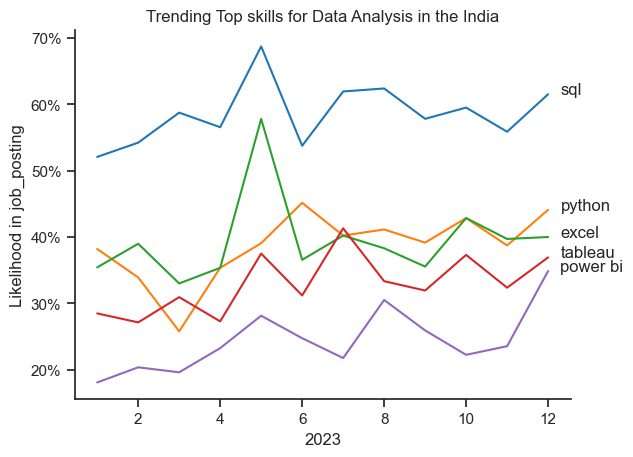

In [55]:
total=df_ind.groupby('job_posted_month_no').size()
df_da_percent=df_ind_pivot.div(total/100,axis=0)
df_plot=df_da_percent.iloc[:,:5]
sb.lineplot(df_plot,dashes=False,palette='tab10')
sb.set_theme(style='ticks')
sb.despine()



plt.title("Trending Top skills for Data Analysis in the India")
plt.ylabel("Likelihood in job_posting")
plt.xlabel("2023")
plt.legend().remove()

from matplotlib.ticker import PercentFormatter as pf
ax=plt.gca()
ax.yaxis.set_major_formatter(pf(decimals=0))
for i in range(5):
    plt.text(12.3,df_plot.iloc[-1,i],df_plot.columns[i])
